# Assignment 1

**Name:** Harikesh Kushwaha

**Entry Number:** 2021PHS7181

# Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.size"] = 15

plt.style.use('dark_background')

# Question 1

We need to find the gradient, numerically of the following function:
$$
f(x_1, x_2) = 12.069 x_1^2+ 21.504x_2^2-1.7321x_1 - x_2
$$

Analytically, the gradient is:
$$
\nabla f(x_1, x_2) = \begin{bmatrix} 24.138x_1 - 1.7321 \\ 43.008x_2 - 1 \end{bmatrix}
$$

The point, at which the gradient is to be calculated is:
$$
x = \begin{bmatrix} 5 \\ 6 \end{bmatrix}
$$

Analytically, the gradient at this point is:
$$
\nabla f(x_1, x_2) = \begin{bmatrix} 24.138\times 5 - 1.7321 \\ 43.008\times 6 - 1 \end{bmatrix} = \begin{bmatrix} 118.9579 \\ 257.048 \end{bmatrix}
$$

## Numerical Solution

Start by defining the given function in Python:

In [7]:
def f(x1, x2):
    return 12.069*x1**2 + 21.504*x2**2 - 1.7321*x1 - x2

Now, we'll define the derivative of the function. We'll write the implemenation of all the three types of derivative methods:

1. Forward Difference
2. Backward Difference
3. Central Difference

### Forward Difference

In [2]:
def dfdx1_fd(x1, x2, eps=1e-3):
    """Compute the derivative of f with respect to x1 using forward differences."""
    f_plus_val = f(x1+eps, x2)
    f_val = f(x1, x2)
    return (f_plus_val - f_val)/eps

def dfdx2_fd(x1, x2, eps=1e-3):
    """Compute the derivative of f with respect to x2 using forward differences."""
    f_plus_val = f(x1, x2+eps)
    f_val = f(x1, x2)
    return (f_plus_val - f_val)/eps


### Backward Difference

In [3]:
def dfdx1_bd(x1, x2, eps=1e-3):
    """Compute the derivative of f with respect to x1 using backward differences."""
    f_val = f(x1, x2)
    f_minus_val = f(x1-eps, x2)
    return (f_val - f_minus_val)/eps

def dfdx2_bd(x1, x2, eps=1e-3):
    """Compute the derivative of f with respect to x2 using backward differences."""
    f_val = f(x1, x2)
    f_minus_val = f(x1, x2-eps)
    return (f_val - f_minus_val)/eps

### Central Difference

In [4]:
def dfdx1_cd(x1, x2, eps=1e-3):
    """Compute the derivative of f with respect to x1 using central differences."""
    f_plus_val = f(x1+eps, x2)
    f_minus_val = f(x1-eps, x2)
    return (f_plus_val - f_minus_val)/(2*eps)

def dfdx2_cd(x1, x2, eps=1e-3):
    """Compute the derivative of f with respect to x2 using central differences."""
    f_plus_val = f(x1, x2+eps)
    f_minus_val = f(x1, x2-eps)
    return (f_plus_val - f_minus_val)/(2*eps)

### The Gradient

Finally, we'll calculate the gradient at the given point using the above three methods. We'll write a single `grad` function which takes the function, the point at which the gradient is to be calculated and the method as input and returns the gradient.

In [5]:
def grad(x1, x2, eps=1e-3, method="cd"):
    """
    Calculate the gradient of f at (x1, x2) using the specified method.

    Parameters
    ----------
    x1 : float
        The value of x1 at which to evaluate the gradient.
    x2 : float
        The value of x2 at which to evaluate the gradient.
    eps : float, optional
        The step size to use for the finite difference method.
    method : str, optional
        The method to use for calculating the gradient. Must be one of
        "fd" (forward differences), "bd" (backward differences), or
        "cd" (central differences).
    
    Returns
    -------
    grad : ndarray
        The gradient of f at (x1, x2).
    """
    if method == "fd":
        return np.array([dfdx1_fd(x1, x2, eps), dfdx2_fd(x1, x2, eps)])
    elif method == "bd":
        return np.array([dfdx1_bd(x1, x2, eps), dfdx2_bd(x1, x2, eps)])
    elif method == "cd":
        return np.array([dfdx1_cd(x1, x2, eps), dfdx2_cd(x1, x2, eps)])
    else:
        raise ValueError("Unknown method")

The thumb rule in the problem pdf states that we should use at least
$$
\epsilon = 0.01 \times |x_i|
$$
Which turns out to be $0.05$ for $x_1 = 5$ and $0.06$ for $x_2 = 6$. To be on safe side, we'll be using $\epsilon = 0.01$

### The Solution for Question 1

In [8]:
x1 = 5
x2 = 6
eps = 1e-2
analytic_grad = np.array([24.138*x1 - 1.7321, 43.008*x2 - 1])
grad_fd = grad(x1, x2, method="fd", eps=eps)
grad_bd = grad(x1, x2, method="bd", eps=eps)
grad_cd = grad(x1, x2, method="cd", eps=eps)
print(f"Results for eps = {eps}")
print(f"Analytic gradient of f at x1 = {x1}, x2 = {x2}: {analytic_grad}")
print("----------------------"*3)
print(f"Gradient of f at x1 = {x1}, x2 = {x2} using forward differences: {grad_fd}")
print(f"Gradient of f at x1 = {x1}, x2 = {x2} using backward differences: {grad_bd}")
print(f"Gradient of f at x1 = {x1}, x2 = {x2} using central differences: {grad_cd}")

Results for eps = 0.01
Analytic gradient of f at x1 = 5, x2 = 6: [118.9579 257.048 ]
------------------------------------------------------------------
Gradient of f at x1 = 5, x2 = 6 using forward differences: [119.07859 257.26304]
Gradient of f at x1 = 5, x2 = 6 using backward differences: [118.83721 256.83296]
Gradient of f at x1 = 5, x2 = 6 using central differences: [118.9579 257.048 ]


Let's see the error made by these methods:

In [9]:
fd_error = np.linalg.norm(analytic_grad - grad_fd)
bd_error = np.linalg.norm(analytic_grad - grad_bd)
cd_error = np.linalg.norm(analytic_grad - grad_cd)

print("Errors")
print("----------------------"*3)
print(f"Error in gradient using forward differences: {fd_error}")
print(f"Error in gradient using backward differences: {bd_error}")
print(f"Error in gradient using central differences: {cd_error}")

Errors
------------------------------------------------------------------
Error in gradient using forward differences: 0.24659334478964567
Error in gradient using backward differences: 0.24659334479591355
Error in gradient using central differences: 3.169530366937052e-12


Okay, central difference is having almost no error at all!

### Error with respect to $\epsilon$

First, we'll create a plot of error in the gradient with respect to $\epsilon$. We'll use 100 different $\epsilon$ s ranging from $10^{-8}$ to $0.1$. The values will be chosen logarithmically. We are using aboslute error here.

In [10]:
epsilons = np.logspace(-8, 0, 200)
fd_errors = np.zeros(epsilons.shape)
bd_errors = np.zeros(epsilons.shape)
cd_errors = np.zeros(epsilons.shape)

for i, eps in enumerate(epsilons):
    fd_errors[i] = np.linalg.norm(analytic_grad - grad(x1, x2, method="fd", eps=eps))
    bd_errors[i] = np.linalg.norm(analytic_grad - grad(x1, x2, method="bd", eps=eps))
    cd_errors[i] = np.linalg.norm(analytic_grad - grad(x1, x2, method="cd", eps=eps))

We are plotting the error with respect to $\epsilon$ in log-log scale as the error is decreasing exponentially with $\epsilon$ and we can't see the plot properly if we don't use log-log scale.

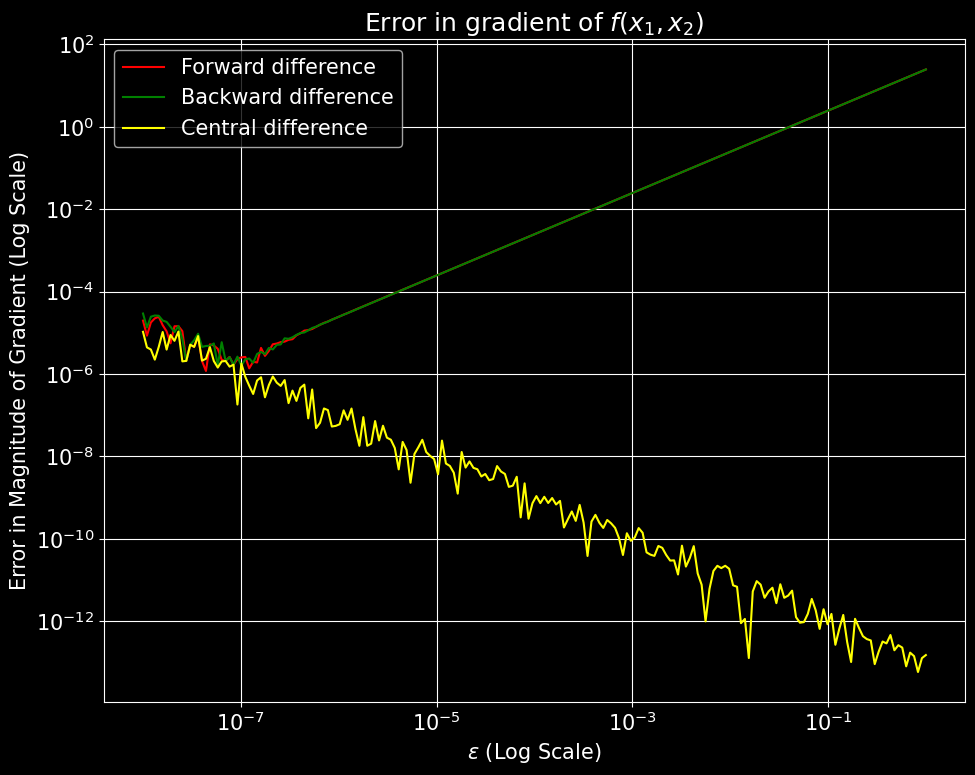

In [10]:
plt.figure(figsize=(10, 8))
plt.loglog(epsilons, fd_errors, label="Forward difference", color="red")
plt.loglog(epsilons, bd_errors, label="Backward difference", color="green")
plt.loglog(epsilons, cd_errors, label="Central difference", color="yellow")
plt.xlabel("$\epsilon$ (Log Scale)")
plt.ylabel("Error in Magnitude of Gradient (Log Scale)")
plt.title("Error in gradient of $f(x_1, x_2)$")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("plots/gradient_error_p1.png")

Something strange is going on here. For central difference, we see that the error is going up as $\epsilon$ in going down.

# Question 2

This time, we have to use the function:
$$
f = \frac{4x_2^2-x_1x_2}{1000(x_2x_1^3-x_1^4)}
$$

Analytically, the gradient is:
$$
\nabla f(x_1, x_2) = \begin{bmatrix} -\dfrac{3x_2\cdot\left(x_1^2-6x_2x_1+4x_2^2\right)}{1000x_1^4\cdot\left(x_1-x_2\right)^2} \\ \dfrac{4x_2^2-8x_1x_2+x_1^2}{1000x_1^3\cdot\left(x_2-x_1\right)^2} \end{bmatrix}
$$

## Defining Function and Gradient

In [13]:
def f(x1,  x2):
    numerator = 4*x2**2 - x1*x2
    denominator = 1000*(x2*x1**3 - x1**4)
    return numerator/(denominator+1e-15)

In [14]:
f(5, 6)

9.12e-05

In [12]:
def gradf(x1, x2):
    t11 = -(3*x2*(x1**2-6*x2*x1+4*x2**2))
    t12 = (1000*x1**4*(x1-x2)**2)
    t1 = t11/(t12+1e-15)

    t21 = (4*x2**2-8*x1*x2+x1**2)
    t22 = (1000*x1**3*(x2-x1)**2)
    t2 = t21/(t22+1e-15)

    return np.array([t1, t2])

## Finding the Gradients

In [13]:
x1 = 0.5
x2 = 1.5
eps = 1e-2
analytic_grad = gradf(x1, x2)
grad_fd = grad(x1, x2, method="fd", eps=eps)
grad_bd = grad(x1, x2, method="bd", eps=eps)
grad_cd = grad(x1, x2, method="cd", eps=eps)
print(f"Results for eps = {eps}")
print(f"Analytic gradient of f at x1 = {x1}, x2 = {x2}: {analytic_grad}")
print("----------------------"*3)
print(f"Gradient of f at x1 = {x1}, x2 = {x2} using forward differences: {grad_fd}")
print(f"Gradient of f at x1 = {x1}, x2 = {x2} using backward differences: {grad_bd}")
print(f"Gradient of f at x1 = {x1}, x2 = {x2} using central differences: {grad_cd}")

Results for eps = 0.01
Analytic gradient of f at x1 = 0.5, x2 = 1.5: [-0.342  0.026]
------------------------------------------------------------------
Gradient of f at x1 = 0.5, x2 = 1.5 using forward differences: [-0.32927319  0.02605941]
Gradient of f at x1 = 0.5, x2 = 1.5 using backward differences: [-0.3555783   0.02593939]
Gradient of f at x1 = 0.5, x2 = 1.5 using central differences: [-0.34242575  0.0259994 ]


We'll also see absolute error before we make a plot:

In [14]:
fd_error = np.linalg.norm(analytic_grad - grad_fd)
bd_error = np.linalg.norm(analytic_grad - grad_bd)
cd_error = np.linalg.norm(analytic_grad - grad_cd)

print("Errors")
print("----------------------"*3)
print(f"Error in gradient using forward differences: {fd_error}")
print(f"Error in gradient using backward differences: {bd_error}")
print(f"Error in gradient using central differences: {cd_error}")

Errors
------------------------------------------------------------------
Error in gradient using forward differences: 0.012726946722870629
Error in gradient using backward differences: 0.013578437520303195
Error in gradient using central differences: 0.0004257475169956433


## Creating Plots

### Error with respect to $\epsilon$

First, we'll create a plot of error in the gradient with respect to $\epsilon$. We'll use 100 different $\epsilon$ s ranging from $10^{-8}$ to $0.1$. The values will be chosen logarithmically. We are using aboslute error here.

In [15]:
epsilons = np.logspace(-8, -1, 200)
fd_errors = np.zeros(epsilons.shape)
bd_errors = np.zeros(epsilons.shape)
cd_errors = np.zeros(epsilons.shape)

for i, eps in enumerate(epsilons):
    fd_errors[i] = np.linalg.norm(analytic_grad - grad(x1, x2, method="fd", eps=eps))
    bd_errors[i] = np.linalg.norm(analytic_grad - grad(x1, x2, method="bd", eps=eps))
    cd_errors[i] = np.linalg.norm(analytic_grad - grad(x1, x2, method="cd", eps=eps))

We are plotting the error with respect to $\epsilon$ in log-log scale as the error is decreasing exponentially with $\epsilon$ and we can't see the plot properly if we don't use log-log scale.

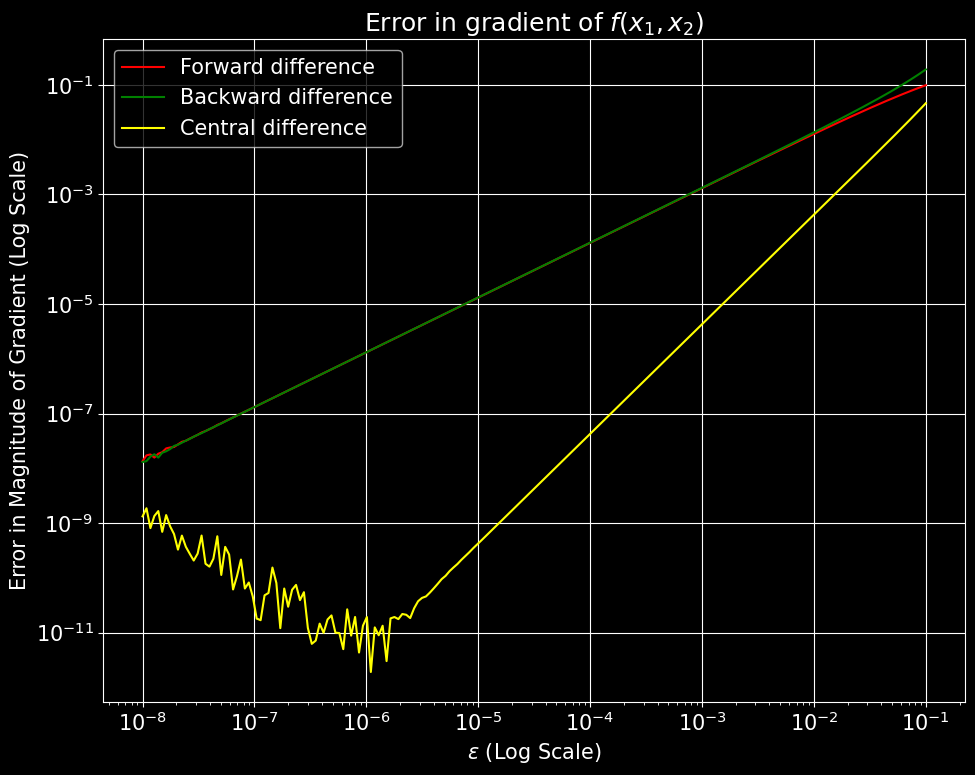

In [16]:
plt.figure(figsize=(10, 8))
plt.loglog(epsilons, fd_errors, label="Forward difference", color="red")
plt.loglog(epsilons, bd_errors, label="Backward difference", color="green")
plt.loglog(epsilons, cd_errors, label="Central difference", color="yellow")
plt.xlabel("$\epsilon$ (Log Scale)")
plt.ylabel("Error in Magnitude of Gradient (Log Scale)")
plt.title("Error in gradient of $f(x_1, x_2)$")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("plots/gradient_error_p2.png")

The figure shows that the numerical gradient converges to the analytical gradient as $\epsilon$ decreases. For central difference, once $\epsilon$ is less than $0.001$, the error is reduced to $10^{-6}$. Also, for forward difference and backward difference, the error is reduced to $10^{-6}$ when $\epsilon$ is less than $10^{-5}$.

It is clear from the picture that the central difference method has the lowest error. In fact, we can zoom in the region where error is relatively high to see that even in this region, central difference method has the lowest error.

Let's zoom to the region where the error is significant:

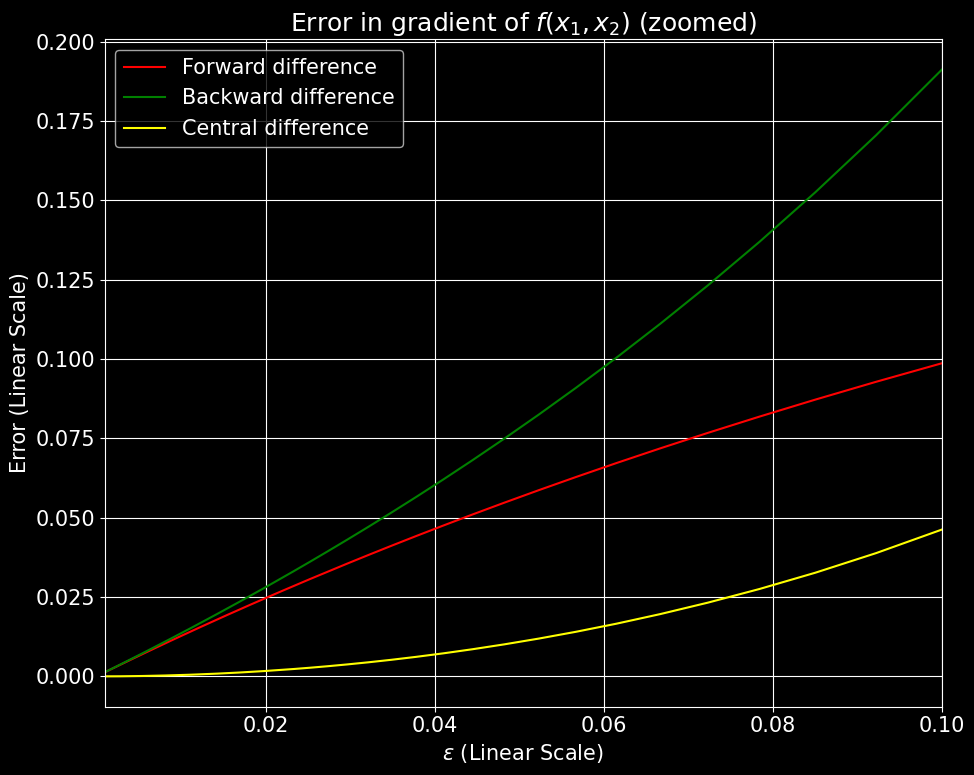

In [17]:
plt.figure(figsize=(10, 8))
plt.plot(epsilons, fd_errors, label="Forward difference", color="red")
plt.plot(epsilons, bd_errors, label="Backward difference", color="green")
plt.plot(epsilons, cd_errors, label="Central difference", color="yellow")
# plt.xscale("log")
plt.xlim(1e-3, epsilons.max())
plt.xlabel("$\epsilon$ (Linear Scale)")
plt.ylabel("Error (Linear Scale)")
plt.title("Error in gradient of $f(x_1, x_2)$ (zoomed)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig("plots/gradient_error_zoomed_p2.png")